In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Suicide Rates per country:**

In [165]:
suicide_rates = r"master.csv"
srates = pd.read_csv(suicide_rates)

In [166]:
srates_it = srates[srates["country"]=="Italy"]
srates_us = srates[srates["country"]=="United States"]

In [167]:
srates_it_cut = srates_it[["year", "sex", "age", "suicides/100k pop"]]
srates_us_cut = srates_us[["year", "sex", "age", "suicides/100k pop"]]
srates_it_cut.set_index("year", inplace=True)
srates_us_cut.set_index("year", inplace=True)

In [168]:
srates_all = srates_it_cut.join(srates_us_cut, on="year", lsuffix="_italy", rsuffix="_states")

In [169]:
srates_us.head(3) # 1985 - 2015

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers


**Substance abuse Rates per country:**

In [170]:
substance_rates = r"prevalence_by_mental_and_substa.csv"
sub_rates = pd.read_csv(substance_rates)

In [171]:
sub_rates_it = sub_rates[sub_rates["entity"]=="Italy"]
sub_rates_us = sub_rates[sub_rates["entity"]=="United States"]

In [172]:
sub_rates_us.head(3) # 1990 - 2017

,entity,code,year,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
6076,United States,USA,1990,0.340897,0.653706,0.468676,6.576884,2.367794,4.677591,2.173751
6077,United States,USA,1991,0.338913,0.653953,0.473575,6.553351,2.345466,4.660871,2.139292
6078,United States,USA,1992,0.337343,0.654205,0.478610,6.536143,2.339515,4.651949,2.107931


**GDP per country:**

In [173]:
gdp_url = r"all_gdp.csv"
all_gdp = pd.read_csv(gdp_url)
all_gdp = all_gdp.rename(columns = {"Year":"DATE"})
all_gdp.set_index("DATE", drop=True, inplace=True)
all_gdp = all_gdp[["GDP Per Capita (US $)_italy", "GDP Per Capita (US $)_states"]].sort_index()

In [174]:
all_gdp.head(3) # 1960 - 2022

,GDP Per Capita (US $)_italy,GDP Per Capita (US $)_states
DATE,,
1960,804,3007
1961,887,3067
1962,990,3244


**Alcoholism Rates per country:**

In [175]:
alcohol_rates = r"share-with-alcohol-and-substance-use-disorders 1990-2016.csv"
alc_rates = pd.read_csv(alcohol_rates)

In [176]:
alc_rates_it = alc_rates[alc_rates["Entity"]=="Italy"]
alc_rates_us = alc_rates[alc_rates["Entity"]=="United States"]

In [177]:
sub_rates_us = sub_rates_us.rename(columns = {"year":"Year"})
alc_rates_us.set_index("Year", inplace=True)
sub_rates_it = sub_rates_it.rename(columns = {"year":"Year"})
alc_rates_it.set_index("Year", inplace=True)

In [178]:
alc_all = alc_rates_it.join(alc_rates_us, on="Year", lsuffix="_italy", rsuffix="_states")

In [179]:
alc_all.head(3) # 1990 - 2016

,Entity_italy,Code_italy,Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)_italy,Entity_states,Code_states,Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)_states
Year,,,,,,
1990,Italy,ITA,1.784691,United States,USA,5.328750
1991,Italy,ITA,1.811794,United States,USA,5.325354
1992,Italy,ITA,1.841858,United States,USA,5.321772


**Housing prices for Italy and US:**

In [180]:
housing = r"QITR628BIS.csv"
housing_2 = r"USSTHPI.csv"

In [181]:
housing_it = pd.read_csv(housing)
housing_us = pd.read_csv(housing_2)
housing_us.drop(175, inplace=True)

In [182]:
housing_data = pd.concat([housing_us, housing_it], axis=1)
housing_data.columns = ["DATE","US_housing_price","DATE_none","IT_housing_price"]
housing_data.drop(columns="DATE_none", inplace=True)
housing_data["DATE"] = pd.to_datetime(housing_data["DATE"])
housing_data.set_index("DATE", drop=True, inplace=True)

In [183]:
housing_data["US_housing_price"] = housing_data["US_housing_price"]*472
housing_data["IT_housing_price"] = (housing_data["IT_housing_price"]*228.671)

In [184]:
housing_data = housing_data.apply(lambda x: round(x, 2))

In [185]:
housing_data.head(3) # 1980 - 2023

,US_housing_price,IT_housing_price
DATE,,
1980-01-01,47200.00,13061.48
1980-04-01,47964.64,13937.82
1980-07-01,49295.68,14895.88


In [186]:
abuse_it = sub_rates_it.join(alc_rates_it, on="Year")
abuse_it.rename(columns={"Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)":"Alcohol abuse (age-standardized percent)"}, inplace=True)
abuse_us = sub_rates_us.join(alc_rates_us, on="Year")
abuse_us.rename(columns={"Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)":"Alcohol abuse (age-standardized percent)"}, inplace=True)

C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year'>

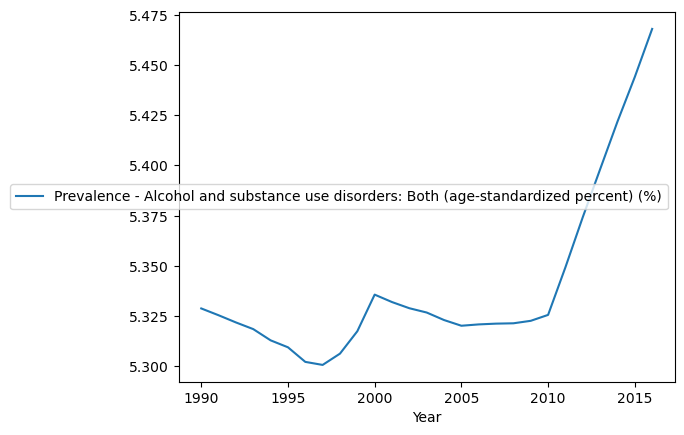

In [187]:
sns.lineplot(alc_rates_us)

C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year'>

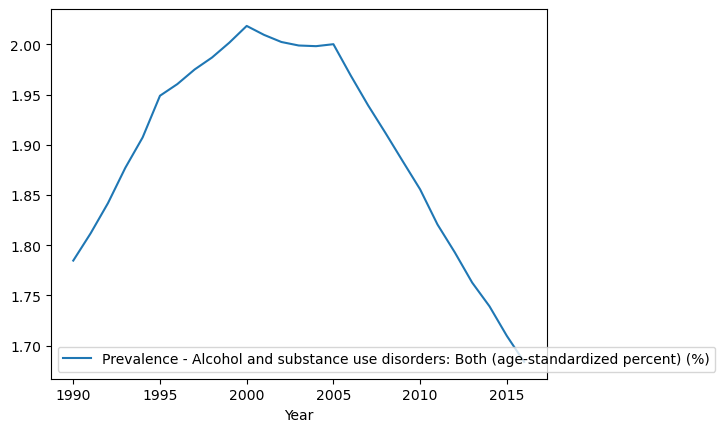

In [188]:
sns.lineplot(alc_rates_it)

C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DATE'>

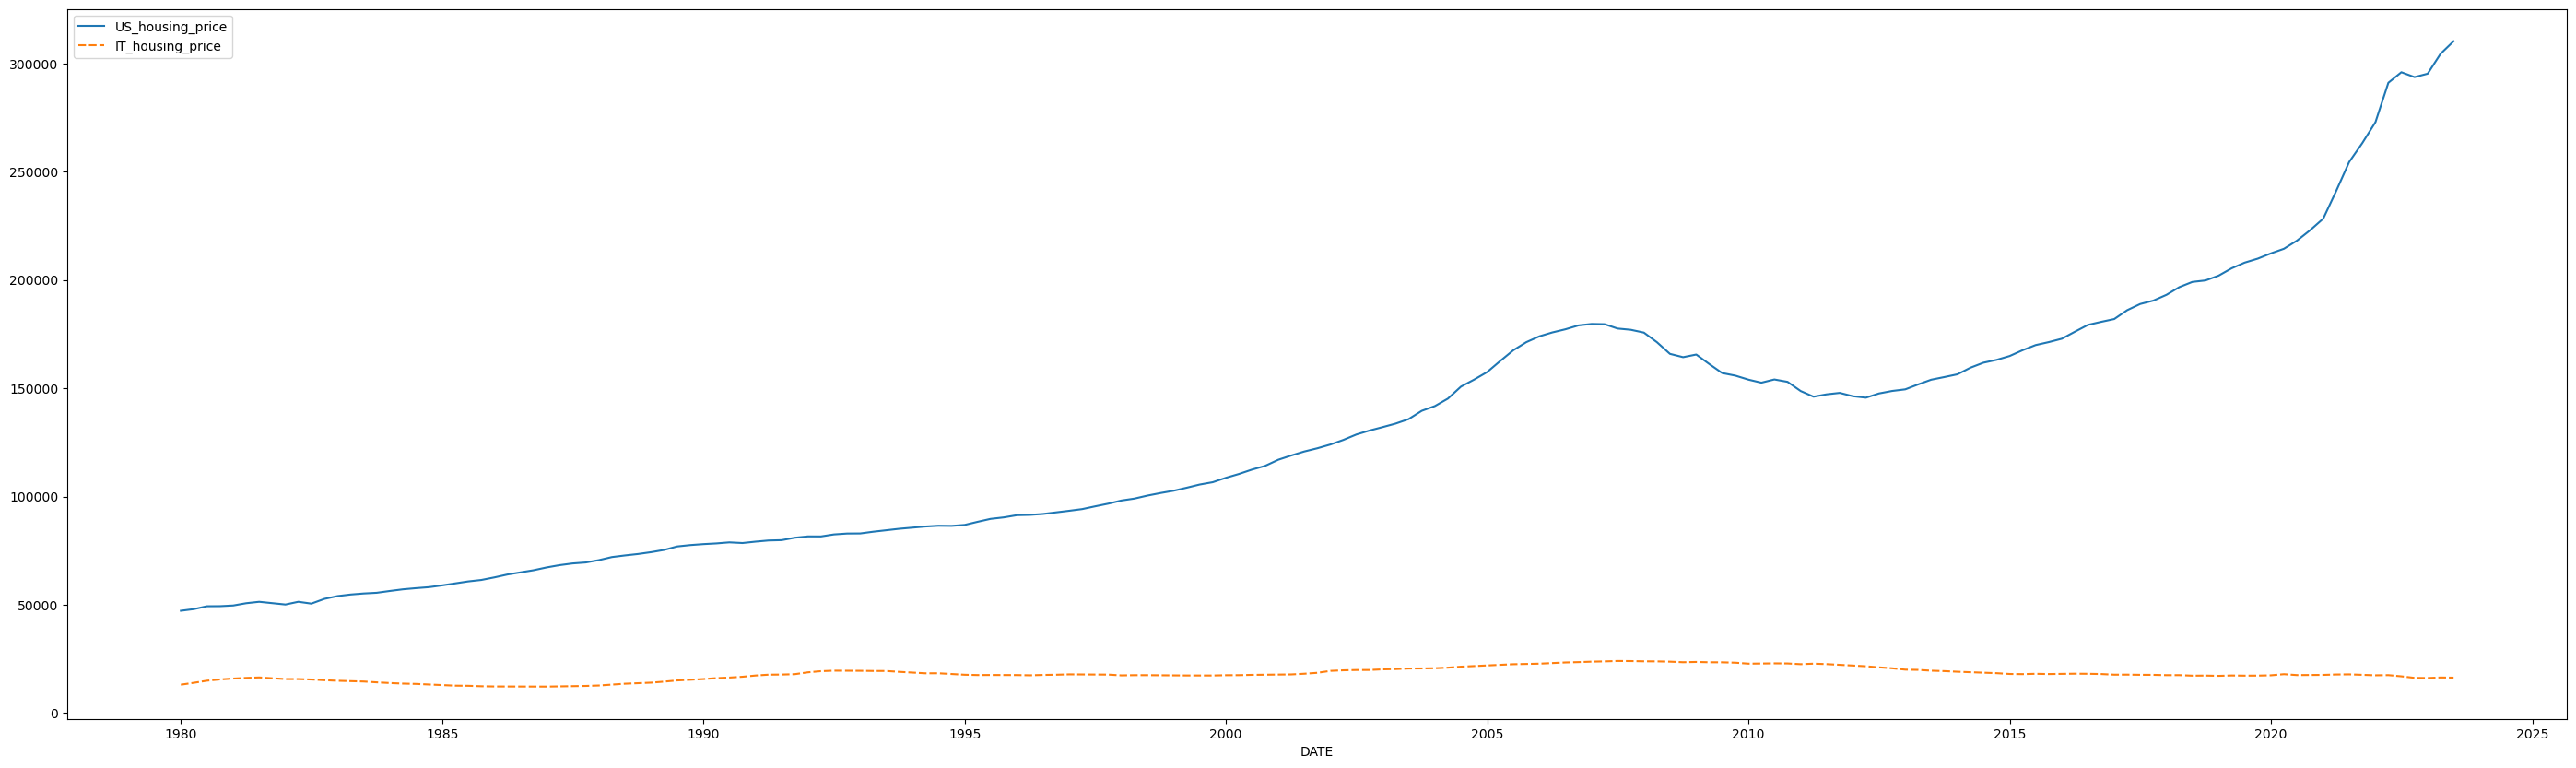

In [189]:
plt.figure(figsize=(35, 10))
# plt.xticks(rotation=90)
sns.lineplot(housing_data)

C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year'>

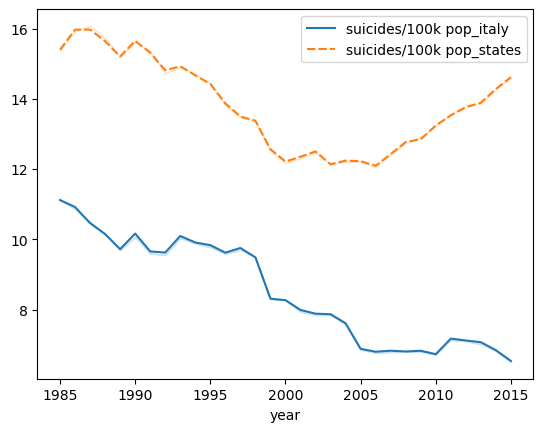

In [190]:
sns.lineplot(srates_all, errorbar=('ci', False))

C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DATE'>

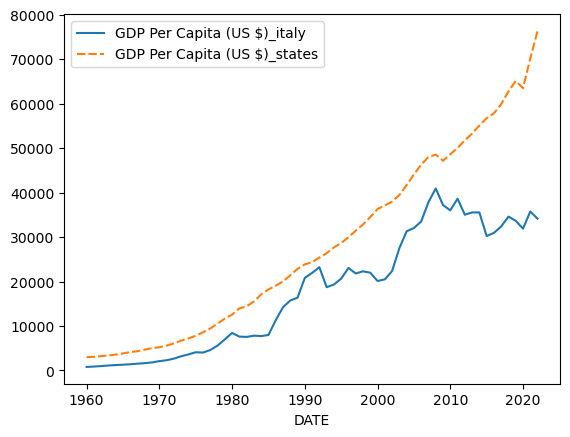

In [191]:
sns.lineplot(all_gdp)

In [192]:
all_gdp.to_excel("all_gdp.xlsx")
srates_all.to_excel("srates_all.xlsx")
alc_all.to_excel("alc_all.xlsx")

In [207]:
alc_all = alc_all[["Code_italy", "Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)_italy", 
                   "Code_states", "Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)_states"]]
alc_all.rename(columns={"Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)_italy":"IT_alcohol_abuse",
                       "Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)_states":"US_alcohol_abuse"},
              inplace=True)
alc_all.to_csv("alc_all.csv")

In [194]:
housing_data["Year"] = housing_data.index.astype(str)
housing_data["Year"] = housing_data["Year"].apply(lambda x: x[:4])

In [195]:
housing_year = housing_data.groupby(["Year"])[["US_housing_price", "IT_housing_price"]].mean().round(2)

In [196]:
housing_year.to_excel("housing_year.xlsx")

C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PariahJack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

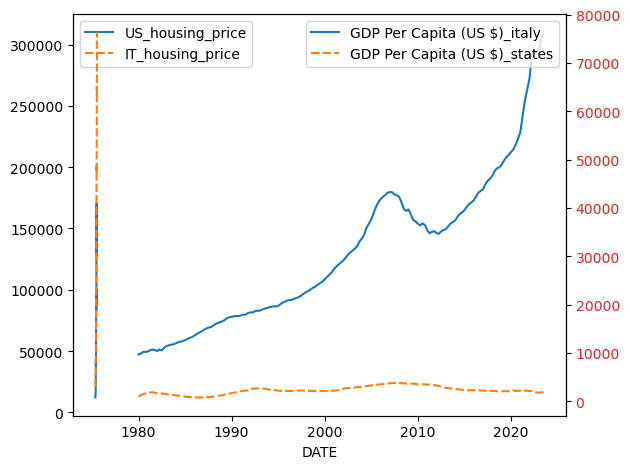

In [198]:
fig, ax = plt.subplots()
sns.lineplot(housing_data, ax=ax)
ax2 = ax.twinx()
ax2.tick_params(axis='y', labelcolor="tab:red")
sns.lineplot(all_gdp, ax=ax2)

In [210]:
srates.rename(columns={"country":"country","suicides/100k pop":"suicides"}, inplace=True)